In [10]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import random

In [11]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [3]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,0.223240,-1.000888,1.180910,-1.412763,-0.785138,0
1,-1.652666,-2.261578,0.026251,-0.941771,0.668754,1
2,-1.326600,-1.166831,-1.101521,-2.416810,0.526230,1
3,-1.159690,-1.969947,1.327895,-1.284374,-1.899179,0
4,-1.788600,-0.864084,1.762704,-1.326666,-0.489490,0


In [4]:
# function for row sampling

def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)

In [5]:
# function for feature sampling
def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  new_df = df[cols]
  new_df['target'] = df['target']
  return new_df

In [8]:
# function for combined sampling

def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)

In [12]:
df1 = combined_sampling(df,0.5,0.5)

/tmp/ipython-input-5-3275485051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [13]:


df2 = combined_sampling(df,0.5,0.5)

/tmp/ipython-input-5-3275485051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [14]:
df3 = combined_sampling(df,0.5,0.5)

/tmp/ipython-input-5-3275485051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [15]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col4', 'col1', 'target'], dtype='object')
Index(['col2', 'col5', 'target'], dtype='object')
Index(['col3', 'col4', 'target'], dtype='object')


In [16]:
df3

,col3,col4,target
9,-2.160185,0.599359,1
38,-1.461915,0.517992,1
27,2.604803,-0.039676,0
75,-2.335309,-0.195006,1
65,3.318327,-2.527457,0
75,-2.335309,-0.195006,1
83,-3.981797,0.299938,1
46,-1.646536,-1.230678,1
1,0.026251,-0.941771,1
6,-1.993560,0.274771,1


In [17]:


from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [18]:


clf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:2],df3.iloc[:,-1])

DecisionTreeClassifier()

In [19]:
from sklearn.tree import plot_tree

[Text(0.6176470588235294, 0.9444444444444444, 'x[1] <= -2.554\ngini = 0.5\nsamples = 50\nvalue = [25, 25]'),
 Text(0.5588235294117647, 0.8333333333333334, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.5882352941176471, 0.8888888888888888, 'True  '),
 Text(0.6764705882352942, 0.8333333333333334, 'x[0] <= -1.041\ngini = 0.482\nsamples = 42\nvalue = [17, 25]'),
 Text(0.6470588235294118, 0.8888888888888888, '  False'),
 Text(0.47058823529411764, 0.7222222222222222, 'x[0] <= -1.465\ngini = 0.493\nsamples = 25\nvalue = [14.0, 11.0]'),
 Text(0.4117647058823529, 0.6111111111111112, 'x[1] <= -0.757\ngini = 0.495\nsamples = 20\nvalue = [9, 11]'),
 Text(0.29411764705882354, 0.5, 'x[0] <= -1.679\ngini = 0.397\nsamples = 11\nvalue = [3, 8]'),
 Text(0.23529411764705882, 0.3888888888888889, 'x[1] <= -2.209\ngini = 0.32\nsamples = 10\nvalue = [2, 8]'),
 Text(0.11764705882352941, 0.2777777777777778, 'x[1] <= -2.281\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.058823529411764705, 0.16666666

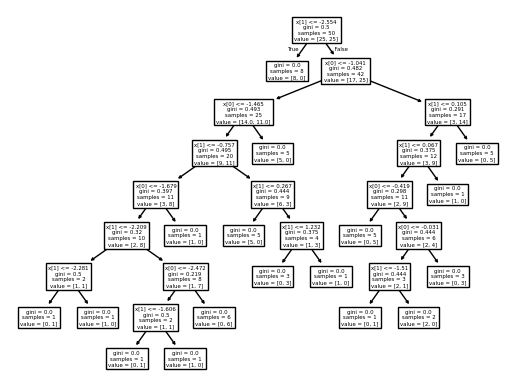

In [20]:
plot_tree(clf1)

[Text(0.45454545454545453, 0.9375, 'x[1] <= 0.279\ngini = 0.5\nsamples = 50\nvalue = [25, 25]'),
 Text(0.18181818181818182, 0.8125, 'x[0] <= -3.633\ngini = 0.26\nsamples = 26\nvalue = [22, 4]'),
 Text(0.3181818181818182, 0.875, 'True  '),
 Text(0.09090909090909091, 0.6875, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.2727272727272727, 0.6875, 'x[1] <= -1.124\ngini = 0.211\nsamples = 25\nvalue = [22, 3]'),
 Text(0.18181818181818182, 0.5625, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.36363636363636365, 0.5625, 'x[1] <= -0.232\ngini = 0.32\nsamples = 15\nvalue = [12, 3]'),
 Text(0.2727272727272727, 0.4375, 'x[0] <= -1.916\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(0.18181818181818182, 0.3125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.36363636363636365, 0.3125, 'x[0] <= -0.837\ngini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(0.2727272727272727, 0.1875, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.45454545454545453, 0.1875, 'x[1] <= -0.527\ngini

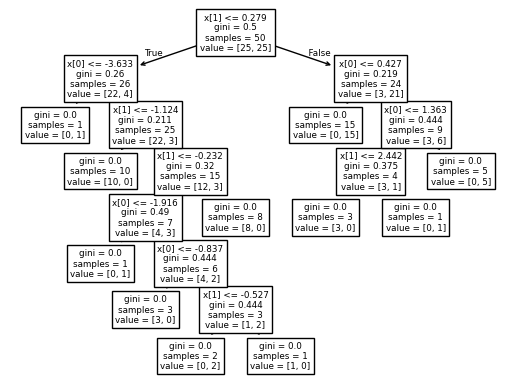

In [21]:
plot_tree(clf2)

[Text(0.5555555555555556, 0.875, 'x[0] <= 0.105\ngini = 0.493\nsamples = 50\nvalue = [22.0, 28.0]'),
 Text(0.3333333333333333, 0.625, 'x[1] <= -2.024\ngini = 0.069\nsamples = 28\nvalue = [1, 27]'),
 Text(0.4444444444444444, 0.75, 'True  '),
 Text(0.2222222222222222, 0.375, 'x[1] <= -2.146\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.1111111111111111, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.3333333333333333, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4444444444444444, 0.375, 'gini = 0.0\nsamples = 25\nvalue = [0, 25]'),
 Text(0.7777777777777778, 0.625, 'x[0] <= 0.288\ngini = 0.087\nsamples = 22\nvalue = [21, 1]'),
 Text(0.6666666666666667, 0.75, '  False'),
 Text(0.6666666666666666, 0.375, 'x[1] <= -1.155\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.5555555555555556, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.7777777777777778, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8888888888888888, 0.375, 'gini = 0

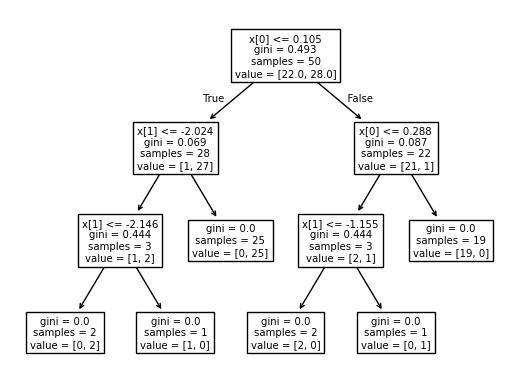

In [22]:
plot_tree(clf3)

In [23]:
clf1.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [24]:
clf2.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [25]:
clf3.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [26]:
df.sample(14,replace=True)

,col1,col2,col3,col4,col5,target
61,-0.795765,-1.318663,4.073220,-1.362255,-2.305325,0
11,-0.960060,0.518001,-0.748584,-1.036840,2.219691,0
5,-4.352747,-1.376902,0.767082,0.950820,-2.133472,0
61,-0.795765,-1.318663,4.073220,-1.362255,-2.305325,0
25,0.349468,-0.205438,-0.423666,-1.500123,1.210349,0
81,-2.872022,-1.322081,2.776874,-0.645534,-1.895939,0
23,-1.924410,0.190090,1.994986,-0.759546,0.177783,0
86,-0.588790,-1.053134,3.569942,-2.439671,-1.781353,0
91,0.088219,-1.043700,1.374841,-0.493629,-0.755305,0
63,-2.457459,2.991197,-1.814340,-0.871979,1.296430,1
